<a href="https://colab.research.google.com/github/manoelpajr/projetos_data_science/blob/master/projeto_covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Panorama atual do Covid-19 no Mundo e no Brasil**

Os coronavírus são uma grande família de vírus comuns em muitas espécies diferentes de animais. Raramente, os coronavírus que infectam animais podem infectar pessoas. Recentemente, em dezembro de 2019, houve transmissão de um novo coronavírus (SARS-CoV-2), o qual foi identificado em Wuhan, na China, e causou a COVID-19, sendo em seguida disseminada e transmitida pessoa a pessoa.

<img alt="Cidade de Buenos Aires" width="50%" src='https://www.sbac.org.br/wp-content/uploads/2020/04/CONHECENDO-O-INIMIGO.png'>

A COVID-19 é uma doença causada pelo coronavírus, denominada SARS-CoV-2, que apresenta um espectro clínico variando de infecções assintomáticas a quadros graves. De acordo com a Organização Mundial da Saúde - OMS, a maioria (cerca de 80%) dos paciente com a doença podem ser assintomáticos ou ologossintomáticos (poucos sintomas), e aproximadamente 20% dos casos detectados requer atendimento hospitalar por apresentarem dificuldade respiratória, dos quais aproximadamente 5% podem necessitar de suporte ventilatório.

Os sintomas mais comuns em pessoas que contraem o COVID-19 são:

*   Tosse
*   Febre
*   Coriza
*   Dor de garganta
*   Dificuldade para respirar
*   Perda de olfato
*   Alteração do paladar
*   Disturbios gastrintetinais
*   Cansaço
*   Diminuição do apetite
*   Dispnéia

A transmissão do vírus ocorre:

*   Toque do aperto de mão contaminadas
*   Gotículas de Saliva
*   Espirro
*   Tosse
*   Catarro
*   Objetos ou superfícies contaminadas, como celulares, mesas, talheres, brinquedos, teclados de computador, etc.

Após algum tempo do aparecimento da doença, mais precisamente em 11 de março de 2020, a COVID-19 foi caracterizada pela OMS como uma pandemia. O termo se refere à distribuição geográfica de uma doenção e não à sua gravidade. A designação reconhece que, no momento, existem surtos do vírus em vários países e regiões do mundo.

Com o objetivo de elevar a consciência situacional do COVID-19 no mundo e no Brasil, iremos realizar uma analise sobre os dados públicos da doença.



##**Obtenção dos dados**

Por se tratar de uma doença nova, a coleta de dados relacionados à doença ainda não possui uma metodologia clara e bem definida. Isso gera alguns gargalos no que diz respeito a informações referentes à doença.

Só para termos uma ideia, no caso do Brasil, alguns veículos da imprensa, criaram um consórcio para realizar os seus próprios levantamentos, pois o órgão público responsável por isso estava alterando a sua metologia de contagem. 

No entanto, para quem deseja ter acesso aos dados levantados pelo Ministério da Saúde, podem encontrá-los [nesse link](https://covid.saude.gov.br/).

Como nosso objetivo é ter uma panorama da situação mundial, bem como da situação brasileira, o *dataset* foi extraído junto ao [Our World Data](https://ourworldindata.org/coronavirus) e pode ser baixado [nesse link](https://raw.githubusercontent.com/manoelpajr/datas_projects_datascience/master/dataset_covid_mundo.csv).

**Importante**: O *dataset* foi atualizado no dia 07 de Agosto de 2020.

Após realizado essa introdução, vamos começar a explorar e analisar o nosso *dataset*.



In [1]:
#instalando a biblioteca pywaffle
!pip install pywaffle -q

     |████████████████████████████████| 532kB 2.8MB/s 


In [2]:
#importar as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter
import seaborn as sns
from pywaffle import Waffle

#importar nosso dataset
df = pd.read_csv('https://raw.githubusercontent.com/manoelpajr/datas_projects_datascience/master/dataset_covid_mundo.csv')

#ver as cinco primeiras entradas
df.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,ABW,North America,Aruba,2020-03-13,2.0,2.0,0.0,0.0,18.733,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29
1,ABW,North America,Aruba,2020-03-20,4.0,2.0,0.0,0.0,37.465,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.33,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29
2,ABW,North America,Aruba,2020-03-24,12.0,8.0,0.0,0.0,112.395,74.930,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.44,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29
3,ABW,North America,Aruba,2020-03-25,17.0,5.0,0.0,0.0,159.227,46.831,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.44,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29
4,ABW,North America,Aruba,2020-03-26,19.0,2.0,0.0,0.0,177.959,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.44,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29


In [3]:
#ver as cinco últimas entradas
df.tail()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
35292,NaN,NaN,International,2020-02-28,705.0,0.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35293,NaN,NaN,International,2020-02-29,705.0,0.0,6.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35294,NaN,NaN,International,2020-03-01,705.0,0.0,6.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35295,NaN,NaN,International,2020-03-02,705.0,0.0,6.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35296,NaN,NaN,International,2020-03-10,696.0,-9.0,7.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Após verificarmos as primeiras e últimas entradas do nosso *dataset*, vamos observar o seu tamanho.

In [4]:
#tamanho do dataframe
print('Dimensões do Dataset:',
      '\n Variáveis: ', df.shape[1],
      '\n Entradas: ', df.shape[0])

Dimensões do Dataset: 
 Variáveis:  36 
 Entradas:  35297


Nosso *dataset* possui um total de 36 variáveis e de 35297 entradas. Vejamos agora o signifcado de cada uma das nossas variáveis.

##**Dicionário das Variáveis**

Para melhor compreendermos nosso *dataset* é importante conhecermos o significado de cada uma das nossas variáveis. Vejamos então a seguir:

*   `iso_code` - código do país com 3 letras
*   `continent` - continente que está localizado o país
*   `location` - nome do país
*   `date` - data de observação
*   `total_cases` - número total de casos confirmados
*   `new_cases` - número de novos casos confirmados
*   `total_deaths` - número total de mortes atribuidos a COVID-19
*   `new_death` - número de novas mortes por COVID-19
*   `total_cases_per_million` - número total de casos confirmados por 1 mi de habitantes
*   `new_cases_per million` - número de novos casos confirmados por 1 mi de habitantes
*   `total_deaths_per_million` - númeto total de mortes por 1 mi da habitantes
*   `new_deaths_per_million` - número de novas mortes por 1 mi de habitantes
*   `total_tests` - número total de testes realizados
*   `new_tests` - número de novos testes realizados
*   `new_testes_smoothed` - número de novos testes suavizados por 7 dias
*   `total_tests_per_thousand` - número total de testes por mil pessoas
*   `new_tests_per_thousand`- número de novos testes por mil pessoas
*   `new_tests_smoothed_per_thousand` - número de novos testes suavizados por 7 dias por mil pessoas
*   `test_per_case` - testes conduzidos por novos casos confirmados de COVID-19, utlizando média móvel de 7 dias.
*   `positive_rate` - parcelar de testes de COVID-19 positivos, suavizado por uma média móvel de 7 dias.
*   `tests_units` - unidade de medida utilizada por cada localidade para relatar os dados sobre testagem
*   `stringency_index` - Índice de Resposta do Governo em relação as medidas tomadas para conter a doença. Por exemplo, fechamento de escolas, fechamento de locais de trabalho, proibições de viagens, etc. O valor varia de 0 a 100, onde 100 significa uma resposta mais restritiva.
*   `population` - número absoluto de habitantes em 2020
*   `population_density` - densidade demográfica, isto é, número absoluto de habitantes dividido pela área
*   `median_age` - idade média da população, projeção para 2020 da ONU
*   `aged_65_older` - proporção de habitanes com 65 ou mais de idade
*   `aged_70_older` - proporção de habitantes com 70 ou mais de idade
*   `gdp_per_capita` - Produto Interno Bruto per *capita* (pessoa)
*   `extreme_poverty` - porcetagem da população que vive na faixa da extrema pobreza
*   `cardiovasc_death_rate` - taxa de mortalidade por doenças cardiovasculares em 2017 (número anual de mortes por 100 mil habitantes)
*   `diabetes_prevalence` - porcentagem da população entre 20 e 79 anos, em 2017, com diabetes
*   `female_smokers` - porcentagem de mulheres fumantes
*   `male_smokers` - porcentagem de homens fumantes
*   `handwashing_facilities` - porcentagem da população com instalações básicas de saneamento básico
*   `hospital_beds_per_thousand` - leitos de hospitais por mil pessoas; disponível a partir de 2010
*   `life_expectancy` - expectativa de vida ao nascer em 2019

Esse é o resumo de nossas variáveis.




##**Analise exploratória dos dados mundial da COVID-19**

Esse é o momento de realizar uma analise mais detalhada sobre nosso *dataset*. No início do trabalho já realizamos algumas visualizações que, nos permitiu verificar a quantidade de entradas e de variáveis, bem como a maneira como os dados estão apresentados.

A partir de agora iremos visualizar com mais detalhes algumas das informações disponível em nosso *dataset* e verificarmos o panorama mundial da COVID-19.


In [5]:
#verificar o nome das colunas
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy'],
      dtype='object')

Essa são as colunas/variáveis disponíves em nosso *dataset*. O significado de cada uma delas pode ser encontrado no **Dicionário das Variáveis** acima.

In [6]:
#verificar o tipo de cada coluna
df.dtypes

iso_code                            object
continent                           object
location                            object
date                                object
total_cases                        float64
new_cases                          float64
total_deaths                       float64
new_deaths                         float64
total_cases_per_million            float64
new_cases_per_million              float64
total_deaths_per_million           float64
new_deaths_per_million             float64
new_tests                          float64
total_tests                        float64
total_tests_per_thousand           float64
new_tests_per_thousand             float64
new_tests_smoothed                 float64
new_tests_smoothed_per_thousand    float64
tests_per_case                     float64
positive_rate                      float64
tests_units                         object
stringency_index                   float64
population                         float64
population_

A verificação do nome de cada coluna é muito importante. Observem que as numéricas estão como `float64` e as de texto estão identificadas como tipo `object`, ou seja, `string`. 

Porém, a coluna `date` deve ser representada como do tipo `datetime` e para isso precisaremos realizar a sua conversão.

In [7]:
#convertendo a coluna date para datetime
df.date = pd.to_datetime(df.date)

In [8]:
#verificando o tipo de cada coluna e a presença de valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35297 entries, 0 to 35296
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   iso_code                         35233 non-null  object        
 1   continent                        35012 non-null  object        
 2   location                         35297 non-null  object        
 3   date                             35297 non-null  datetime64[ns]
 4   total_cases                      34952 non-null  float64       
 5   new_cases                        34952 non-null  float64       
 6   total_deaths                     34952 non-null  float64       
 7   new_deaths                       34952 non-null  float64       
 8   total_cases_per_million          34888 non-null  float64       
 9   new_cases_per_million            34888 non-null  float64       
 10  total_deaths_per_million         34888 non-null  float64  

A partir do resultado acima, podemos verificar que houve a conversão da coluna `date` para `datetime`. Além disso, podemos, agora, verificar que algumas colunas possuem valores ausentes.

Vamos verificar a quantidade de valores ausentes presentes em cada uma das colunas.

In [9]:
#quantidade de valores ausentes
df.isnull().sum().sort_values(ascending=False)

new_tests_per_thousand             24208
new_tests                          24208
total_tests_per_thousand           23861
total_tests                        23861
tests_per_case                     23671
positive_rate                      23327
new_tests_smoothed                 22829
new_tests_smoothed_per_thousand    22829
tests_units                        22083
handwashing_facilities             20705
extreme_poverty                    14327
male_smokers                       10449
female_smokers                     10145
stringency_index                    6531
hospital_beds_per_thousand          6453
aged_65_older                       4022
gdp_per_capita                      3952
aged_70_older                       3723
median_age                          3559
cardiovasc_death_rate               3534
diabetes_prevalence                 2466
population_density                  1606
life_expectancy                      493
new_deaths_per_million               409
total_deaths_per

Acima temos as variáveis com a quantidade absoluta de valores ausentes. Vejamos agora a quantidade relativa desses valores.

In [10]:
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

new_tests_per_thousand             0.685837
new_tests                          0.685837
total_tests_per_thousand           0.676006
total_tests                        0.676006
tests_per_case                     0.670624
positive_rate                      0.660878
new_tests_smoothed                 0.646769
new_tests_smoothed_per_thousand    0.646769
tests_units                        0.625634
handwashing_facilities             0.586594
extreme_poverty                    0.405899
male_smokers                       0.296031
female_smokers                     0.287418
stringency_index                   0.185030
hospital_beds_per_thousand         0.182820
aged_65_older                      0.113947
gdp_per_capita                     0.111964
aged_70_older                      0.105476
median_age                         0.100830
cardiovasc_death_rate              0.100122
diabetes_prevalence                0.069864
population_density                 0.045500
life_expectancy                 

Veremos mais adinte que esses valores ausentes ocorre por conta das características de cada uma de nossas variáveis. Alguns dados possuem elevados valores ausentes, pois não são preenchidos conforme as datas disponíveis no *dataset*.

##**Visualização dos Dados**

Após fazer uma breve exploração do nosso *dataset* chegou o momento de verificarmos algumas desses dados através dos *plots*. Isso permitirá que façamos algumas analises sobre a situação atual da pandemia causada pelo COVID-19.

Só para ressalvar, de acordo com os conhecimentos adquiridos junto ao curso *Data Science na Prática*, existem duas abordagens para visualização de dados com `matplotlib`, são elas:

*   Abordagem Orientada a Objetos - nesse estilo criamos dois objetos, um `Figure` e outro `Axes`, e chamamos os métodos em cima deles.
*   Abordagem Interface Pyplot - nesse estilo temos toda a responsabilidade de se criar e gerenciar os objetos `Figure` e `Axes`.

Esse trabalho fará a utilização das duas abordagens, vejamos a seguir:


###**TOP 5 em número de casos, mortes, novos casos e novas mortes**

Para iniciar o processo de visualização dos dados verificaremos quais são os cinco países que se encontram no topo da lista de casos, mortes, novos casos e novas mortes por COVID-19, no mundo. 

Vale ressalvar, nesse momento, que os dados utilizados para analise foram atualizados no dia 30 de Julho de 2020, ou seja, todas as analises feitas aqui valem apenas para até essa data.

Vejamos a seguir:

In [11]:
#os cinco países com maior número de casos
top5_total_cases = df.loc[df.date == '2020-08-07',['location', 'total_cases']].sort_values(by='total_cases', ascending=False)[1:6]


In [12]:
#os cincos países com maior número de mortes
top5_total_deaths = df.loc[df.date == '2020-08-07', ['location', 'total_deaths']].sort_values(by='total_deaths', ascending=False)[1:6]

In [13]:
#os cinco países com maior número de novos casos
top5_new_cases = df.loc[df.date == '2020-08-07', ['location', 'new_cases']].sort_values(by='new_cases', ascending=False)[1:6]

In [14]:
#os cinco países com maior número de novas mortes
top5_new_deaths = df.loc[df.date == '2020-08-07', ['location', 'new_deaths']].sort_values(by='new_deaths', ascending=False)[1:6]

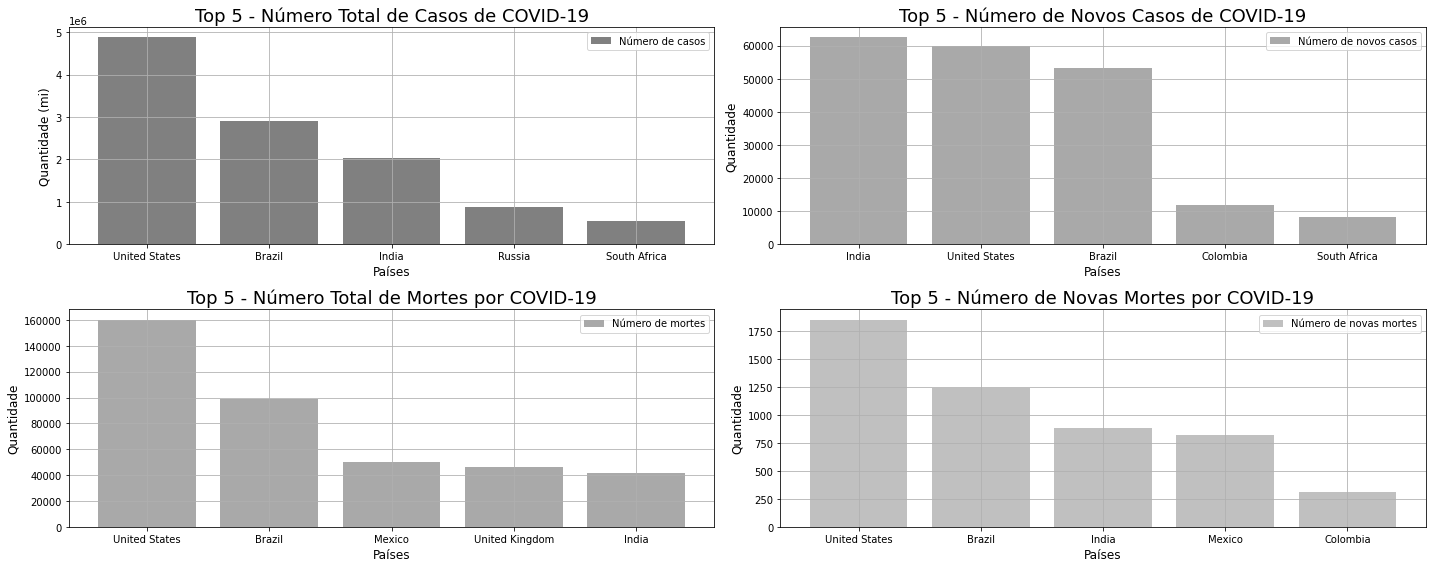

In [15]:
#Metodologia Orientada a Objetos para plotar os gráficos

#criação da figure e dos axes
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 8))

#criando o primeiro gráfico - número total de casos
ax[0][0].bar('location', 'total_cases', data=top5_total_cases, color='grey', label='Número de casos')
ax[0][0].set_title('Top 5 - Número Total de Casos de COVID-19', size=18)
ax[0][0].set_xlabel('Países', size=12)
ax[0][0].set_ylabel('Quantidade (mi)', size=12)
ax[0][0].grid(True)
ax[0][0].legend()

#criando o segundo gráfico - número total de novos casos
ax[0][1].bar('location', 'new_cases', data=top5_new_cases, color='darkgray', label='Número de novos casos')
ax[0][1].set_title('Top 5 - Número de Novos Casos de COVID-19', size=18)
ax[0][1].set_xlabel('Países', size=12)
ax[0][1].set_ylabel('Quantidade', size=12)
ax[0][1].grid(True)
ax[0][1].legend()

#criando o terceiro gráfico - número total de mortes
ax[1][0].bar('location', 'total_deaths', data=top5_total_deaths, color='darkgrey', label='Número de mortes')
ax[1][0].set_title('Top 5 - Número Total de Mortes por COVID-19', size=18)
ax[1][0].set_xlabel('Países', size=12)
ax[1][0].set_ylabel('Quantidade', size=12)
ax[1][0].grid(True)
ax[1][0].legend()

#criando o quarto gráfico - número de novas mortes
ax[1][1].bar('location', 'new_deaths', data=top5_new_deaths, color='silver', label='Número de novas mortes')
ax[1][1].set_title('Top 5 - Número de Novas Mortes por COVID-19', size=18)
ax[1][1].set_xlabel('Países', size=12)
ax[1][1].set_ylabel('Quantidade', size=12)
ax[1][1].grid(True)
ax[1][1].legend()

#ajustando a saída dos gráficos
plt.tight_layout()

A partir da observação dos gráficos, com dados atualizados no dia 08 de Agosto de 2020, podemos conncluir que:

*   Os Estados Unidos e o Brasil estão entre os cinco primeiros em todos os indicadores acima.
*   Três países já ultrapasaram a casa de dois milhões de casos confirmados: os Estados Unidos, o Brasil e a Índia.
*   Os Estados Unidos, o Brasil, o México, o Reino Unidos e a Índia ultrapassaram 40 mil mortes por COVID-19.
*   Os Estados Unidos e o Brasil são os únicos países que atingiram mais de 90 mil mortes pela doença.
*   Os números de novos casos diários na Índia, nos Estados Unidos e no Brasil, para a última data, ficou acima de 50 mil.
*   Os número de novas mortes superaram as mil mortes, na última data, nos Estados Unidos e no Brasil, sendo que a Índia e o México ficaram acima de 750.

###**Evolução do Número de Casos e Mortes**

A partir de agora vejamos a evolução mundial no número total de casos e mortes por COVID-19. 


In [16]:
#fazendo uma copia do dataframe
df_clean = df.copy()

#colocando a coluna date como nosso index
df_clean.set_index(df_clean.date, inplace=True)


#criando uma variávesl para o número total de casos no mundo
num_cases = df_clean.loc[df_clean.location == 'World', 'total_cases']


#criando uma variável para o número total de mortes no mundo
num_deaths = df_clean.loc[df_clean.location == 'World', 'total_deaths']

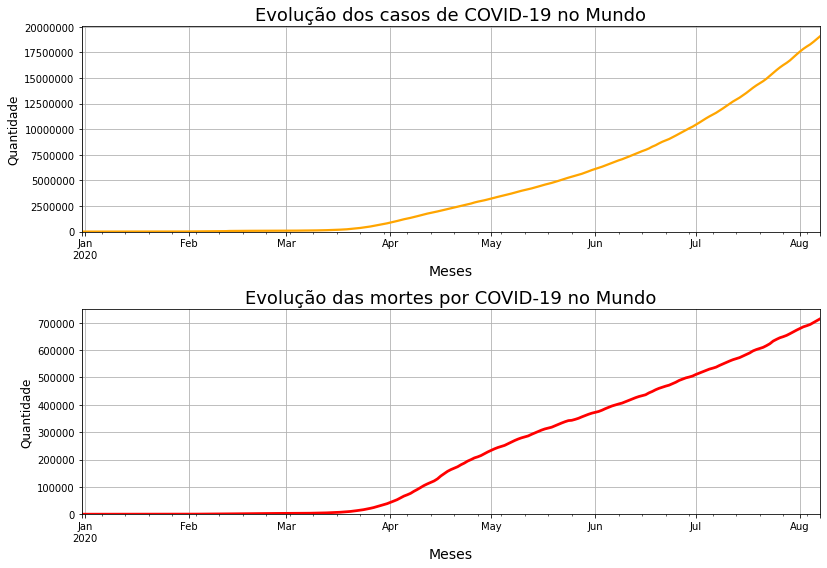

In [17]:
#Metodologia da Abordagem Interface Pyplot

#criando um objeto do tipo figure
plt.figure()

#criando o gráfico de número total de casos de Covid-19
plt.subplot(221)
num_cases.plot(x='date', y='num_cases', linewidth=2.25, color='orange', figsize=(22,8))
plt.title('Evolução dos casos de COVID-19 no Mundo', size=18)
plt.xlabel('Meses', size=14)
plt.ylabel('Quantidade', size=12)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.ylim(0)
plt.grid(True)

#criando o gráfico de número total de mortes por Covid-19
plt.subplot(223)
num_deaths.plot(x='date', y='num_deaths', linewidth=2.75, color='red', figsize=(22,8))
plt.title('Evolução das mortes por COVID-19 no Mundo', size=18)
plt.xlabel('Meses', size=14)
plt.ylabel('Quantidade', size=12)
plt.ylim(0)
plt.grid(True)

#ajustando a saída dos gráficos
plt.tight_layout()

A observação e analise dos gráficos, nos ajudar a concluir que:

*   Tanto o número de casos, como de mortes, estão numa tendência clara de alta.
*   O mês de Abril ficou marcado como o mês em que o número de casos ultrapassou a barreira de um milhão, e o número de mortes, a de 100 mil.
*   No último dia de coleta dos dados, dia 07 de Agosto de 2020, o número de casos ultrapassou a marca de 18 milhões.
*   Nesse mesmo dia, o número de mortes, ultrapassou o limiar de 700 mil.

###**Evolução de Novos Casos e Novas Mortes**

A partir de agora veremos como anda a evolução do número de novos casos e de novas mortes por COVID-19.

In [18]:
#criando a variável de novos casos
new_cases = df_clean.loc[df_clean.location == 'World', 'new_cases']

#calculando a média móvel de 7 dias para os novos casos
new_cases_media = new_cases.rolling(window=7).mean()


In [19]:
#criando a variável de novas mortes
new_deaths = df_clean.loc[df_clean.location == 'World', 'new_deaths']

#calculando a média móvel de sete dias para novas mortes
new_deaths_media = new_deaths.rolling(window=7).mean()

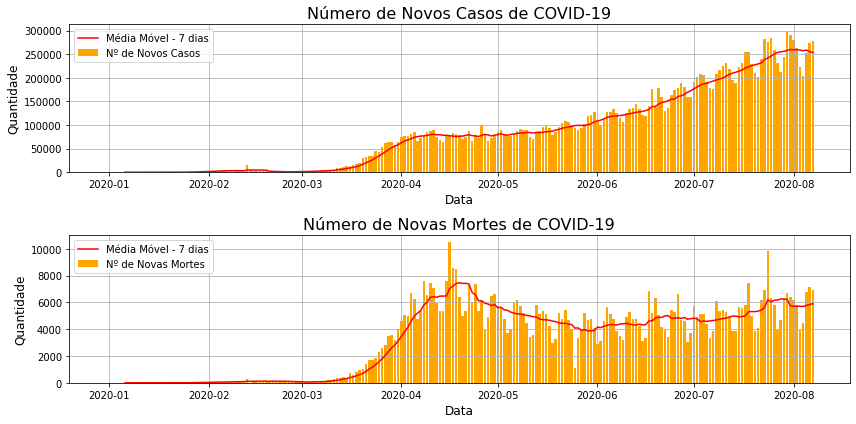

In [20]:
#Abordagem Orientada a objetos
#criando objetos do tipo Figure e Axes
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,6))

#criando o primeiro gráfico referente ao número de novos casos
ax[0].bar(new_cases.index, new_cases, color='orange', label='Nº de Novos Casos')
ax[0].plot(new_cases_media.index, new_cases_media, color='red', label='Média Móvel - 7 dias')
ax[0].set_title('Número de Novos Casos de COVID-19', size=16)
ax[0].set_xlabel('Data', size=12)
ax[0].set_ylabel('Quantidade', size=12)
ax[0].set_ylim(0)
ax[0].grid(True)
ax[0].legend()

#criando o segundo gráfico referente ao número de novas mortes
ax[1].bar(new_deaths.index, new_deaths, color='orange', label='Nº de Novas Mortes')
ax[1].plot(new_deaths_media.index, new_deaths_media, color='red', label='Média Móvel - 7 dias')
ax[1].set_title('Número de Novas Mortes de COVID-19', size=16)
ax[1].set_xlabel('Data', size=12)
ax[1].set_ylabel('Quantidade', size=12)
ax[1].grid(True)
ax[1].legend()

#ajustando a saída dos plots
plt.tight_layout()

A partir da observação dos dois gráficos, podemos concluir que:

*   O Número de novos casos, o final de julho, chegou a ficar próximo a 300 mil.
*   A partir de meados de julho, o número de novos casos, foi superior a 200 mil novos casos até a última data do *dataset*.
*   A média móvel de sete dias veio numa clara tendência de alta, porém, no início de Agosto, deu uma pequena declinada.
*   O número de novas mortes só ultrapassou a barreira de 10 mil, no mês de Abril.
*   A média móvel de sete dias, demostra uma tendência de estabilidade do número de novas mortes a partir de Maio, permanecendo entre 4 a 6 mil.

###**Correlação entre Número de Mortes e PIB per *capita***

Nessa nossa última visualização, vamos utilizar o gráfico de correlação `scatterplot` para observar a se existe alguma correlação entre o número total de mortes com o Produto Interno Bruno por pessoa.

Vejamos a seguir:

In [21]:
#criando a variável número total de mortes com o PIB per capita
gdp_total_mortes = df.loc[df.date == '2020-08-07', ['location', 'total_deaths', 'gdp_per_capita']].sort_values(by='total_deaths', ascending=False)

#removendo os valores nulos
my_data = gdp_total_mortes.dropna(how='any', subset=['total_deaths', 'gdp_per_capita'])

#removendo a linha Mundo
my_data.drop(35232, axis=0, inplace=True)


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


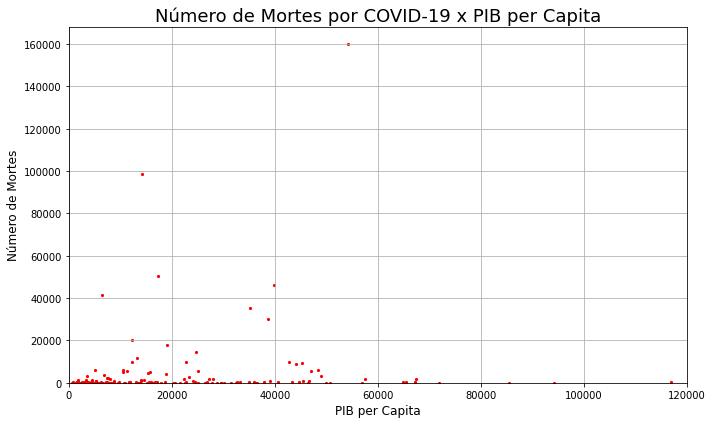

In [22]:
#Metodologia orientada a objetos
#criando os objetos Figure e Axes
fig, ax = plt.subplots(figsize=(10,6))

#plotando o gráfico scatter
ax.scatter(x='gdp_per_capita', y='total_deaths', data=my_data, s=4.5, color='red')
ax.set_title('Número de Mortes por COVID-19 x PIB per Capita', size=18)
ax.set_xlabel('PIB per Capita', size=12)
ax.set_ylabel('Número de Mortes', size=12)
ax.set_xlim(0, 120000)
ax.set_ylim(0)
ax.grid(True)

#ajustando a saída do plot
plt.tight_layout()

A partir da analise do gráfico de dispersão referente a correlação entre número de mortes por COVID-19 e Produto Interno Bruto *per capita*, podemos concluir que:

*   não há uma clara relação entre maior número de mortes e menor PIB per capita.
*   existem países com PIB *per capita* superior a 30 mil dólares por ano com números de mortos acima de 30 mil pessoas.
*   por outro lado, temos países com PIB *per capita* abaixo de 20 mil dólares e com número de mortes acima de 30 mil.
*   os casos do Brasil e dos Estados Unidos, que possuem pib *per capita* bastante distintos e, são os dois únicos com número de mortos acima de 100 mil.
*   interessante ressaltar que alguns países, com pib *per capita* baixos e possuem número de mortes baixos.

Enfim, essa correlação nos permite uma infinidade de *instights*.

##**Panorama brasileiro em relação à COVID-19**

A partir de agora, vamos dar uma atenção especial ao Brasil. Queremos entender como está a situação brasileiras em relação à doença. Para isso, buscaremos demosntrar quando os casos iniciaram, as primeiras mortes, bem como tentar enteder a nossa tendência, dentre outras informações.

Segundo notícias divulgadas pelos veículos de comunicação, e os datos mais atualizados para a data de 08 de Agosto de 2020, o país acabou de ultrapassar o limiar de 100 mil mortes por COVID-19. 

Vejamos a seguir algumas informações referentes a esse panorama.

###**Quando?**

Vejamos então quando começou a aparecer os primeiros casos e as primeiras mortes por COVID-19, no Brasil.


In [23]:
#criando o df com dados para o Brasil
df_brazil = df.loc[df.location == 'Brazil'].copy()

#verificando as cinco primeiras entradas
df_brazil.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
4567,BRA,South America,Brazil,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
4568,BRA,South America,Brazil,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
4569,BRA,South America,Brazil,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
4570,BRA,South America,Brazil,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
4571,BRA,South America,Brazil,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88


In [24]:
#verificando as cinco últimas linhas
df_brazil.tail()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
4783,BRA,South America,Brazil,2020-08-03,2733677.0,25800.0,94104.0,541.0,12860.767,121.378,442.719,2.545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
4784,BRA,South America,Brazil,2020-08-04,2750318.0,16641.0,94665.0,561.0,12939.056,78.289,445.358,2.639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
4785,BRA,South America,Brazil,2020-08-05,2801921.0,51603.0,95819.0,1154.0,13181.825,242.770,450.787,5.429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
4786,BRA,South America,Brazil,2020-08-06,2859073.0,57152.0,97256.0,1437.0,13450.701,268.875,457.547,6.760,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
4787,BRA,South America,Brazil,2020-08-07,2912212.0,53139.0,98493.0,1237.0,13700.697,249.996,463.367,5.820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88


In [25]:
df_brazil.date.max()

Timestamp('2020-08-07 00:00:00')

In [26]:
#identificar o primeiro caso
df_brazil.loc[df_brazil['new_cases'] != 0.0].head(1)

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
4624,BRA,South America,Brazil,2020-02-26,1.0,1.0,0.0,0.0,0.005,0.005,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88


In [27]:
#imprimir a data do primeiro caso
print('O primeio caso foi registrado em {}'.format(df_brazil.date.loc[4624]))

O primeio caso foi registrado em 2020-02-26 00:00:00


In [28]:
#identificar a primeira morte
df_brazil.loc[df_brazil['new_deaths']!= 0.0].head(1)

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
4645,BRA,South America,Brazil,2020-03-18,291.0,57.0,1.0,1.0,1.369,0.268,0.005,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.65,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88


In [29]:
#identifica da data da primeira morte
print('A primeira morte foi registrada em {}'.format(df_brazil.date.loc[4645]))

A primeira morte foi registrada em 2020-03-18 00:00:00


In [30]:
#calculando a quantidade de dias entre o primeiro caso e a primeira morte
from datetime import date
delta = df_brazil.date.loc[4645] - df_brazil.date.loc[4624]
print('Se passaram {} dias entre o primeiro caso e a primeira morte no Brasil.'.format(delta.days))

Se passaram 21 dias entre o primeiro caso e a primeira morte no Brasil.


A partir das informações acima, concluimos que:

   *   O primeiro caso aconteceu no dia 26 de Fevereiro de 2020.
   *   A primeira morte aconteceu no dia 18 de Março de 2020.
   *   Entre a data do primeiro caso e da primeira morte se passaram, exatamente, 21 dias. 

###**Visualização dos Dados**

A partir de agora veremos alguns gráficos com informações relativas a situação do Brasil em relação à COVID-19. 

####***Evolução dos Casos e Mortes***

Vejamos agora como foi a evolução do número de casos e mortes do COVID-19 no Brasil.

In [31]:
#criando um dataframe com as informações mais importantes
#fazendo uma copia do dataframe
df_brazil_evolution = df_brazil.copy()
total_cases_brazil = df_brazil_evolution.loc[4623:4787]
total_cases_brazil

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
4623,BRA,South America,Brazil,2020-02-25,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
4624,BRA,South America,Brazil,2020-02-26,1.0,1.0,0.0,0.0,0.005,0.005,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
4625,BRA,South America,Brazil,2020-02-27,1.0,0.0,0.0,0.0,0.005,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
4626,BRA,South America,Brazil,2020-02-28,1.0,0.0,0.0,0.0,0.005,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
4627,BRA,South America,Brazil,2020-02-29,1.0,0.0,0.0,0.0,0.005,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4783,BRA,South America,Brazil,2020-08-03,2733677.0,25800.0,94104.0,541.0,12860.767,121.378,442.719,2.545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
4784,BRA,South America,Brazil,2020-08-04,2750318.0,16641.0,94665.0,561.0,12939.056,78.289,445.358,2.639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
4785,BRA,South America,Brazil,2020-08-05,2801921.0,51603.0,95819.0,1154.0,13181.825,242.770,450.787,5.429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
4786,BRA,South America,Brazil,2020-08-06,2859073.0,57152.0,97256.0,1437.0,13450.701,268.875,457.547,6.760,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88


In [32]:
total_deaths_brazil = df_brazil_evolution.loc[4644:4787]
total_deaths_brazil

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
4644,BRA,South America,Brazil,2020-03-17,234.0,34.0,0.0,0.0,1.101,0.160,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.87,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
4645,BRA,South America,Brazil,2020-03-18,291.0,57.0,1.0,1.0,1.369,0.268,0.005,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.65,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
4646,BRA,South America,Brazil,2020-03-19,428.0,137.0,4.0,3.0,2.014,0.645,0.019,0.014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.20,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
4647,BRA,South America,Brazil,2020-03-20,621.0,193.0,6.0,2.0,2.922,0.908,0.028,0.009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.20,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
4648,BRA,South America,Brazil,2020-03-21,904.0,283.0,11.0,5.0,4.253,1.331,0.052,0.024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.76,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4783,BRA,South America,Brazil,2020-08-03,2733677.0,25800.0,94104.0,541.0,12860.767,121.378,442.719,2.545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
4784,BRA,South America,Brazil,2020-08-04,2750318.0,16641.0,94665.0,561.0,12939.056,78.289,445.358,2.639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
4785,BRA,South America,Brazil,2020-08-05,2801921.0,51603.0,95819.0,1154.0,13181.825,242.770,450.787,5.429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
4786,BRA,South America,Brazil,2020-08-06,2859073.0,57152.0,97256.0,1437.0,13450.701,268.875,457.547,6.760,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88


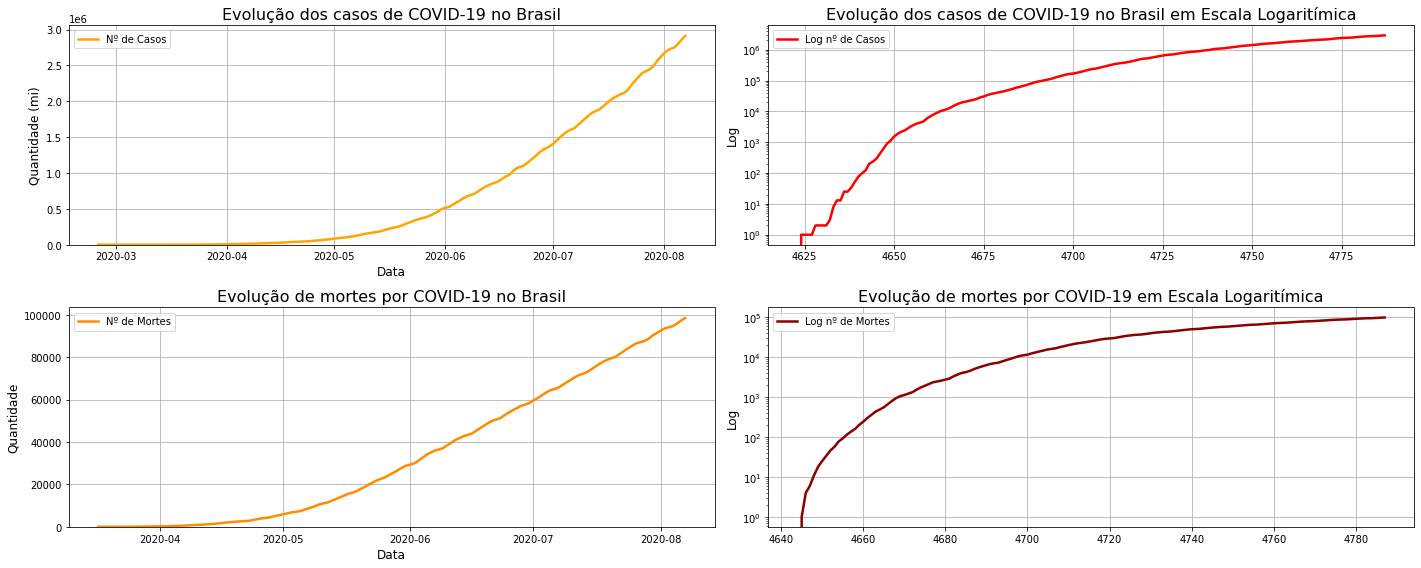

In [33]:
#criando os objetos Figure e Axes
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,8))

#gráfico - evolução do covid-19 no Brasil
ax[0][0].plot(total_cases_brazil.date, total_cases_brazil.total_cases, linewidth=2.5, color='orange', label='Nº de Casos')
ax[0][0].set_xlabel('Data', size=12)
ax[0][0].set_ylabel('Quantidade (mi)', size=12)
ax[0][0].set_title('Evolução dos casos de COVID-19 no Brasil', size=16)
ax[0][0].set_ylim(0)
ax[0][0].legend()
ax[0][0].grid(True)

#gráfico - evolução logaritmica do covid-19 no Brasil 
ax[0][1].plot(total_cases_brazil.index, total_cases_brazil.total_cases, linewidth=2.5, color='red', label='Log nº de Casos')
ax[0][1].set_yscale('log')
ax[0][1].set_title('Evolução dos casos de COVID-19 no Brasil em Escala Logaritímica', size=16)
ax[0][1].set_ylabel('Log', size=12)
ax[0][1].legend()
ax[0][1].grid(True)

#gráfico - evolução de mortes por covid-19 no Brasil
ax[1][0].plot(total_deaths_brazil.date, total_deaths_brazil.total_deaths, linewidth=2.5, color='darkorange', label='Nº de Mortes')
ax[1][0].set_title('Evolução de mortes por COVID-19 no Brasil', size=16)
ax[1][0].set_xlabel('Data', size=12)
ax[1][0].set_ylabel('Quantidade', size=12)
ax[1][0].set_ylim(0)
ax[1][0].legend()
ax[1][0].grid(True)

#gráfico - evolução logaritímica de mortes por covid-19 no brasil
ax[1][1].plot(total_deaths_brazil.index, total_deaths_brazil.total_deaths, linewidth=2.5, color='darkred', label='Log nº de Mortes')
ax[1][1].set_yscale('log') 
ax[1][1].set_title('Evolução de mortes por COVID-19 em Escala Logaritímica', size=16)
ax[1][1].set_ylabel('Log', size=12)
ax[1][1].legend()
ax[1][1].grid(True)

#ajustando a saída
plt.tight_layout()


A partir da observação dos gráficos podemos concluir que:

*   na escala linear, existe um clara tendência de alta no número de casos e mortes.
*   na escala logarítmica na base 10, em que os intervalos são multiplicados por 10, observa-se que existe uma tendência de estabilização dos casos e mortes.

####***Número de Novos Casos e Novas Mortes***

Agora iremos visualizar os gráficos de novos casos e novas mortes por COVID-19 no Brasil, até o dia 08 de Agosto de 2020.


In [ ]:
new_cases_brazil = total_cases_brazil.loc[total_cases_brazil.location == 'Brazil', ['date', 'new_cases']]
new_cases_media_brazil = new_cases_brazil.rolling(window=7).mean()

In [35]:
new_deaths_brazil = total_cases_brazil.loc[total_cases_brazil.location == 'Brazil', ['date', 'new_deaths']]
new_deaths_brazil_media = new_deaths_brazil.rolling(window=7).mean()

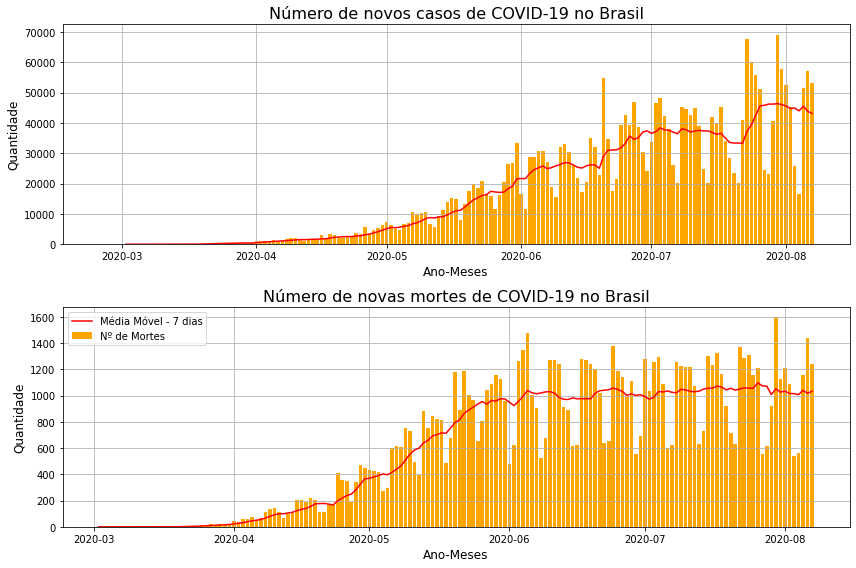

In [36]:
fig, ax = plt.subplots(nrows=2, ncols=1,figsize=(12,8))

ax[0].bar(total_cases_brazil.date, total_cases_brazil.new_cases, color='orange')
ax[0].plot(new_cases_brazil.date, new_cases_media_brazil, linewidth=1.5, color='red')
ax[0].set_title('Número de novos casos de COVID-19 no Brasil', size=16)
ax[0].set_xlabel('Ano-Meses', size=12)
ax[0].set_ylabel('Quantidade', size=12)
ax[0].set_xlim()
ax[0].grid(True)

ax[1].bar(total_deaths_brazil.date, total_deaths_brazil.new_deaths, color='orange', label=('Nº de Mortes'))
ax[1].plot(new_deaths_brazil.date, new_deaths_brazil_media, linewidth=1.5, color='red', label=('Média Móvel - 7 dias'))
ax[1].set_title('Número de novas mortes de COVID-19 no Brasil', size=16)
ax[1].set_xlabel('Ano-Meses', size=12)
ax[1].set_ylabel('Quantidade', size=12)
ax[1].grid(True)
ax[1].legend()

plt.tight_layout()

A partir das informações visualizadas nos gráficos, podemos concluir que:

*   o número de novos casos começou a se estabilizar num patamar acima de 50 mil por dia.
*   em alguns poucos dias, o número de novos casos ultrapassou a barreira dos 60 mil.
*   a média móvel de sete dias, no final de Julho e início de Agosto, demonstra uma tendência de estabilização no número de novos casos.
*   o número de novas mortes veio, desde Junho,  frequentemente, ultrapassando o número de 1000 mortes por dia.
*   a média móvel de sete dias para o número de novas mortes se estabilizou, um pouco acima, de 100 mortes por dia, nos últimos dois meses.


##**Conclusão**

Esse trabalho teve como objetivo explorar e analisar os dados da COVID-19 para o Mundo e para o Brasil.

Nele podemos perceber que ainda há uma clara tendência de alta no número de mortes e no número de casos da doença. No entanto, quando analisamos os números de novos casos e novas mortes, observa-se uma tendência a estabilização, tanto no mundo, quanto no Brasil.